In [2]:
Installing collected packages: mysqlclient
Successfully installed mysqlclient-2.0.3
!pip install mysql-connector-python-rf
Defaulting to user installation because normal site-packages is not writeable
Collecting mysql-connector-python-rf
  Downloading mysql-connector-python-rf-2.2.2.tar.gz (11.9 MB)
     |████████████████████████████████| 11.9 MB 7.2 MB/s eta 0:00:01
Building wheels for collected packages: mysql-connector-python-rf
  Building wheel for mysql-connector-python-rf (setup.py) ... done
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp38-cp38-linux_x86_64.whl size=249455 sha256=b7c3181c84c95b47ae140949751123b4eaf164adcf6e88fb1f329ef316f6d590
  Stored in directory: /home/students/chnimm/.cache/pip/wheels/f5/66/87/6d9cef740fd440ef390930fdbe6c761dc1efef78ec94a288fd
Successfully built mysql-connector-python-rf
Installing collected packages: mysql-connector-python-rf
Successfully installed mysql-connector-python-rf-2.2.2
myvars = {}
with open("chnimm-mysql-password") as myfile:
     for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()
dict_keys(['DB username', 'DB databasename', 'DB password'])
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()
cursor.execute('select * from Pulsesurvey')
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data = list(rows)
127261
<class 'tuple'>
cursor.execute('select * from Pulsesurvey_3_4')
columns = cursor.description
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data1 = list(rows)
22301
<class 'tuple'>
cols=[]
for col in columns:
    cols.append(col[0])
​
---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<ipython-input-19-558dd7b5831a> in <module>
      1 cols=[]
----> 2 for col in columns:
      3     cols.append(col[0])

NameError: name 'columns' is not defined

import pandas as pd
import scipy.stats
import numpy as np
​
data_df = pd.DataFrame(data)
data_df.columns = cols
data_df.head()
Birthyear	Gender	Hispanic	Race	Education	Maritalstatus	Numkid	Recvacc	Getvacc	Workloss	...	Tenure	Enroll1	Enroll2	Enroll3	Teach1	Teach2	Teach3	Teach4	Teach5	Income
0	1962	2	1	4	4	2	0	2	3	2	...	1	-88	-88	-88	-88	-88	-88	-88	-88	-88
1	1941	1	1	1	5	1	0	2	1	2	...	2	-88	-88	-88	-88	-88	-88	-88	-88	4
2	1951	2	1	1	4	3	0	2	3	2	...	1	-88	-88	-88	-88	-88	-88	-88	-88	-99
3	1978	1	1	2	3	1	4	2	2	1	...	3	1	-99	-99	1	-99	-99	-99	-99	3
4	1985	2	1	1	6	1	3	2	1	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	-88
5 rows × 39 columns

data_df['binary']=data_df['Getvacc'].apply(lambda x: 0 if(x=='3' or x=='4') else(1))
data_df.head()
Birthyear	Gender	Hispanic	Race	Education	Maritalstatus	Numkid	Recvacc	Getvacc	Workloss	...	Enroll1	Enroll2	Enroll3	Teach1	Teach2	Teach3	Teach4	Teach5	Income	binary
0	1962	2	1	4	4	2	0	2	3	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	0
1	1941	1	1	1	5	1	0	2	1	2	...	-88	-88	-88	-88	-88	-88	-88	-88	4	1
2	1951	2	1	1	4	3	0	2	3	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-99	0
3	1978	1	1	2	3	1	4	2	2	1	...	1	-99	-99	1	-99	-99	-99	-99	3	1
4	1985	2	1	1	6	1	3	2	1	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	1
5 rows × 40 columns

#New datafarme with selected variables#
myvars = {}
with open("chnimm-mysql-password") as myfile:
     for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()
dict_keys(['DB username', 'DB databasename', 'DB password'])
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()
cursor.execute('select * from Pulsesurvey_New')
columns = cursor.description
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data_new = list(rows)
127261
<class 'tuple'>
cols=[]
for col in columns:
    cols.append(col[0])
                
import pandas as pd
import scipy.stats 
import numpy as np
​
data_new_df = pd.DataFrame(data_new)
data_new_df.columns = cols
data_new_df.head()
Birthyear	Gender	Hispanic	Race	Education	Maritalstatus	Numkid	Getvacc	Workloss	Expectloss	...	Interest	Down	Hlthins4	Hlthins8	Prescript	Mh_svcs	Mh_notget	Tenure	Teach4	Income
0	1962	2	1	4	4	2	0	3	2	2	...	1	1	1	2	2	2	2	1	-88	-88
1	1941	1	1	1	5	1	0	1	2	2	...	3	3	2	-99	2	2	2	2	-88	4
2	1951	2	1	1	4	3	0	3	2	2	...	3	2	2	2	2	2	2	1	-88	-99
3	1978	1	1	2	3	1	4	2	1	2	...	1	2	1	1	2	2	2	3	-99	3
4	1985	2	1	1	6	1	3	1	2	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	-88
5 rows × 22 columns

#Binary model#
data_new_df['binary']=data_new_df['Getvacc'].apply(lambda x: 0 if(x=='3' or x=='4') else(1))
data_new_df.head()
​
Birthyear	Gender	Hispanic	Race	Education	Maritalstatus	Numkid	Getvacc	Workloss	Expectloss	...	Down	Hlthins4	Hlthins8	Prescript	Mh_svcs	Mh_notget	Tenure	Teach4	Income	binary
0	1962	2	1	4	4	2	0	3	2	2	...	1	1	2	2	2	2	1	-88	-88	0
1	1941	1	1	1	5	1	0	1	2	2	...	3	2	-99	2	2	2	2	-88	4	1
2	1951	2	1	1	4	3	0	3	2	2	...	2	2	2	2	2	2	1	-88	-99	0
3	1978	1	1	2	3	1	4	2	1	2	...	2	1	1	2	2	2	3	-99	3	1
4	1985	2	1	1	6	1	3	1	2	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	1
5 rows × 23 columns

#Removing Getvacc and binary columns as the daat is to be clustered based on peoples willigness to get vaccine or not#
R_df= data_new_df.drop(columns=['Getvacc','binary'])
R_df.head()
​
Birthyear	Gender	Hispanic	Race	Education	Maritalstatus	Numkid	Workloss	Expectloss	Kindwork	...	Interest	Down	Hlthins4	Hlthins8	Prescript	Mh_svcs	Mh_notget	Tenure	Teach4	Income
0	1962	2	1	4	4	2	0	2	2	-88	...	1	1	1	2	2	2	2	1	-88	-88
1	1941	1	1	1	5	1	0	2	2	-88	...	3	3	2	-99	2	2	2	2	-88	4
2	1951	2	1	1	4	3	0	2	2	-88	...	3	2	2	2	2	2	2	1	-88	-99
3	1978	1	1	2	3	1	4	1	2	2	...	1	2	1	1	2	2	2	3	-99	3
4	1985	2	1	1	6	1	3	2	2	2	...	-88	-88	-88	-88	-88	-88	-88	-88	-88	-88
5 rows × 21 columns

#K-means clustering of new dataframe(R_df)#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = R_df.values
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)
kmeans2.cluster_centers_ 
plt.scatter(x[:,0],x[:,1],c= y_kmeans2)
x
[0 0 0 ... 0 0 0]
array([[1962, '2', '1', ..., '1', '-88', '-88'],
       [1941, '1', '1', ..., '2', '-88', '4'],
       [1951, '2', '1', ..., '1', '-88', '-99'],
       ...,
       [1950, '1', '1', ..., '1', '-88', '3'],
       [1982, '1', '1', ..., '2', '-99', '8'],
       [1959, '2', '1', ..., '1', '-88', '4']], dtype=object)

pip install kmodes
Defaulting to user installation because normal site-packages is not writeable
Collecting kmodes
  Downloading kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
Requirement already satisfied: scikit-learn>=0.22.0 in /usr/local/lib/python3.8/dist-packages (from kmodes) (0.23.1)
Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.8/dist-packages (from kmodes) (0.16.0)
Requirement already satisfied: numpy>=1.10.4 in /usr/local/lib/python3.8/dist-packages (from kmodes) (1.18.5)
Requirement already satisfied: scipy>=0.13.3 in /usr/local/lib/python3.8/dist-packages (from kmodes) (1.5.2)
Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn>=0.22.0->kmodes) (2.1.0)
Installing collected packages: kmodes
Successfully installed kmodes-0.11.0
Note: you may need to restart the kernel to use updated packages.
pip install --upgrade kmodes
Defaulting to user installation because normal site-packages is not writeable
Requirement already satisfied: kmodes in ./.local/lib/python3.8/site-packages (0.11.0)
Requirement already satisfied: joblib>=0.11 in /usr/local/lib/python3.8/dist-packages (from kmodes) (0.16.0)
Requirement already satisfied: scipy>=0.13.3 in /usr/local/lib/python3.8/dist-packages (from kmodes) (1.5.2)
Requirement already satisfied: scikit-learn>=0.22.0 in /usr/local/lib/python3.8/dist-packages (from kmodes) (0.23.1)
Requirement already satisfied: numpy>=1.10.4 in /usr/local/lib/python3.8/dist-packages (from kmodes) (1.18.5)
Requirement already satisfied: threadpoolctl>=2.0.0 in /usr/local/lib/python3.8/dist-packages (from scikit-learn>=0.22.0->kmodes) (2.1.0)
Note: you may need to restart the kernel to use updated packages.
#K-prototype clustering of new datafranme(R_df)#
from kmodes.kprototypes import KPrototypes
​
x = R_df.values
kproto = KPrototypes(n_clusters=2)
clusters = kproto.fit_predict(x, categorical=[2])
​
pred = KPrototypes(n_clusters=2).fit_predict(x, categorical=[2])
plot= plt.scatter(x, pred.astype(float), title="k-prototypes")
​
!pip install --user mysql-client 

In [15]:
!pip3 install --user mysqlclient

     |████████████████████████████████| 88 kB 198 kB/s  eta 0:00:01
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp38-cp38-linux_x86_64.whl size=109325 sha256=b0e1ca0ba011d0ae3bff60bb802d5e6528892de4a6fefd4c94dee28600f8570f
  Stored in directory: /home/students/chnimm/.cache/pip/wheels/3a/c1/c3/5a19639a551c921c2c2b39468f4278ce5aa27b4e386a4158e4
Successfully built mysqlclient


In [16]:
!pip install mysql-connector-python-rf

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.9 MB 7.2 MB/s eta 0:00:01
  Created wheel for mysql-connector-python-rf: filename=mysql_connector_python_rf-2.2.2-cp38-cp38-linux_x86_64.whl size=249455 sha256=b7c3181c84c95b47ae140949751123b4eaf164adcf6e88fb1f329ef316f6d590
  Stored in directory: /home/students/chnimm/.cache/pip/wheels/f5/66/87/6d9cef740fd440ef390930fdbe6c761dc1efef78ec94a288fd
Successfully built mysql-connector-python-rf


In [18]:
myvars = {}
with open("chnimm-mysql-password") as myfile:
     for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [19]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()

In [46]:
cursor.execute('select * from Pulsesurvey')
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data = list(rows)

127261
<class 'tuple'>


In [23]:
cursor.execute('select * from Pulsesurvey_3_4')
columns = cursor.description
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data1 = list(rows)

22301
<class 'tuple'>


In [19]:
cols=[]
for col in columns:
    cols.append(col[0])


NameError: name 'columns' is not defined

In [62]:
import pandas as pd
import scipy.stats
import numpy as np

data_df = pd.DataFrame(data)
data_df.columns = cols
data_df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Recvacc,Getvacc,Workloss,...,Tenure,Enroll1,Enroll2,Enroll3,Teach1,Teach2,Teach3,Teach4,Teach5,Income
0,1962,2,1,4,4,2,0,2,3,2,...,1,-88,-88,-88,-88,-88,-88,-88,-88,-88
1,1941,1,1,1,5,1,0,2,1,2,...,2,-88,-88,-88,-88,-88,-88,-88,-88,4
2,1951,2,1,1,4,3,0,2,3,2,...,1,-88,-88,-88,-88,-88,-88,-88,-88,-99
3,1978,1,1,2,3,1,4,2,2,1,...,3,1,-99,-99,1,-99,-99,-99,-99,3
4,1985,2,1,1,6,1,3,2,1,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [79]:
data_df['binary']=data_df['Getvacc'].apply(lambda x: 0 if(x=='3' or x=='4') else(1))
data_df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Recvacc,Getvacc,Workloss,...,Enroll1,Enroll2,Enroll3,Teach1,Teach2,Teach3,Teach4,Teach5,Income,binary
0,1962,2,1,4,4,2,0,2,3,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,0
1,1941,1,1,1,5,1,0,2,1,2,...,-88,-88,-88,-88,-88,-88,-88,-88,4,1
2,1951,2,1,1,4,3,0,2,3,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-99,0
3,1978,1,1,2,3,1,4,2,2,1,...,1,-99,-99,1,-99,-99,-99,-99,3,1
4,1985,2,1,1,6,1,3,2,1,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,1


In [ ]:
#New datafarme with selected variables#

In [3]:
myvars = {}
with open("chnimm-mysql-password") as myfile:
     for line in myfile:
        name, var = line.partition(":")[::2]
        myvars[name.strip()] = var.strip()
myvars.keys()

dict_keys(['DB username', 'DB databasename', 'DB password'])

In [4]:
import MySQLdb
conn = MySQLdb.connect(host="localhost", user=myvars['DB username'], passwd=myvars['DB password'], db='I501Sp21grp9_db')
cursor = conn.cursor()

In [5]:
cursor.execute('select * from Pulsesurvey_New')
columns = cursor.description
rows = cursor.fetchall()
print(len(rows))
print(type(rows))
data_new = list(rows)

127261
<class 'tuple'>


In [6]:
cols=[]
for col in columns:
    cols.append(col[0])
                

In [8]:
import pandas as pd
import scipy.stats 
import numpy as np

data_new_df = pd.DataFrame(data_new)
data_new_df.columns = cols
data_new_df.head()

,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Interest,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income
0,1962,2,1,4,4,2,0,3,2,2,...,1,1,1,2,2,2,2,1,-88,-88
1,1941,1,1,1,5,1,0,1,2,2,...,3,3,2,-99,2,2,2,2,-88,4
2,1951,2,1,1,4,3,0,3,2,2,...,3,2,2,2,2,2,2,1,-88,-99
3,1978,1,1,2,3,1,4,2,1,2,...,1,2,1,1,2,2,2,3,-99,3
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [9]:
#Binary model#
data_new_df['binary']=data_new_df['Getvacc'].apply(lambda x: 0 if(x=='3' or x=='4') else(1))
data_new_df.head()


,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Getvacc,Workloss,Expectloss,...,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income,binary
0,1962,2,1,4,4,2,0,3,2,2,...,1,1,2,2,2,2,1,-88,-88,0
1,1941,1,1,1,5,1,0,1,2,2,...,3,2,-99,2,2,2,2,-88,4,1
2,1951,2,1,1,4,3,0,3,2,2,...,2,2,2,2,2,2,1,-88,-99,0
3,1978,1,1,2,3,1,4,2,1,2,...,2,1,1,2,2,2,3,-99,3,1
4,1985,2,1,1,6,1,3,1,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,1


In [10]:
#Removing Getvacc and binary columns as the data is to be clustered based on peoples willigness to get vaccine or not#
R_df= data_new_df.drop(columns=['Getvacc','binary'])
R_df.head()


,Birthyear,Gender,Hispanic,Race,Education,Maritalstatus,Numkid,Workloss,Expectloss,Kindwork,...,Interest,Down,Hlthins4,Hlthins8,Prescript,Mh_svcs,Mh_notget,Tenure,Teach4,Income
0,1962,2,1,4,4,2,0,2,2,-88,...,1,1,1,2,2,2,2,1,-88,-88
1,1941,1,1,1,5,1,0,2,2,-88,...,3,3,2,-99,2,2,2,2,-88,4
2,1951,2,1,1,4,3,0,2,2,-88,...,3,2,2,2,2,2,2,1,-88,-99
3,1978,1,1,2,3,1,4,1,2,2,...,1,2,1,1,2,2,2,3,-99,3
4,1985,2,1,1,6,1,3,2,2,2,...,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88


In [36]:
#K-means clustering of new dataframe(R_df)#
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
x = R_df
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)
kmeans2.cluster_centers_ 
plt.scatter(x[:, 0], x[:, 1])
x

[0 0 0 ... 0 0 0]


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [25]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=10)
kmeans.fit(R_df)
plt.scatter()

KMeans(n_clusters=2)

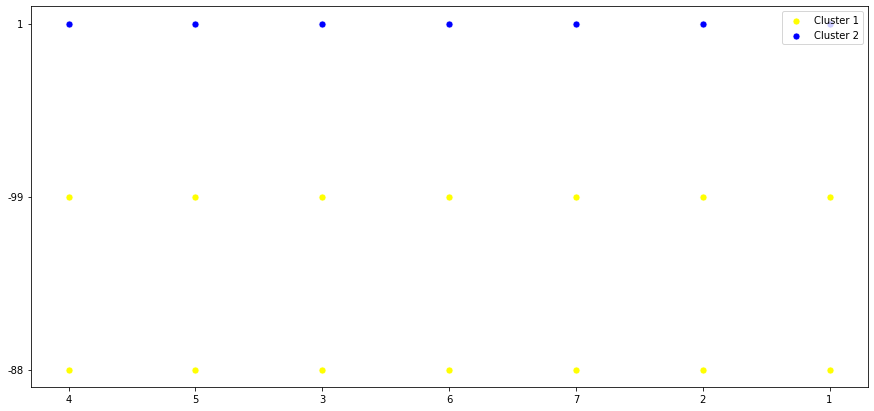

In [33]:
import seaborn as sns
X = R_df.iloc[:, [4, 19]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
plt.show()

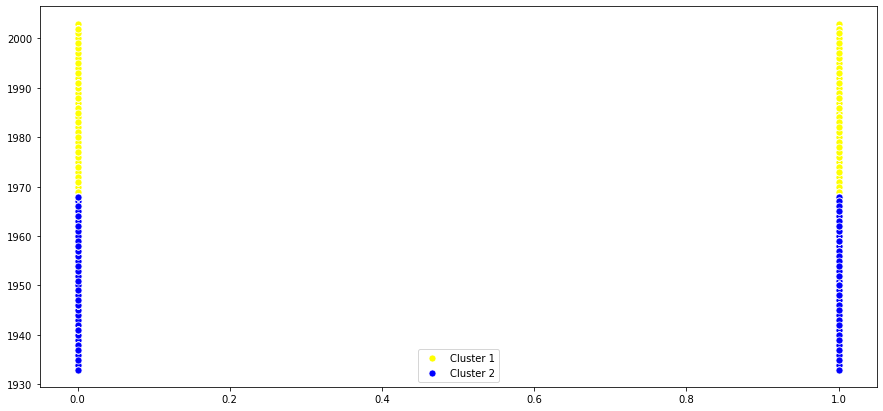

In [58]:
X = data_new_df.iloc[:, [0, 22]].values
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 1], X[y_kmeans == 0, 0], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 1], X[y_kmeans == 1, 0], color = 'blue', label = 'Cluster 2',s=50)
plt.show()

In [190]:
pip install kmodes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [191]:
pip install --upgrade kmodes

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#K-prototype clustering of new datafranme(R_df)#
from kmodes.kprototypes import KPrototypes

x = R_df.values
kproto = KPrototypes(n_clusters=2)
clusters = kproto.fit_predict(x, categorical=[2])


In [ ]:
pred = KPrototypes(n_clusters=2).fit_predict(x, categorical=[2])
plot= plt.scatter(x, pred.astype(float), title="k-prototypes")


In [ ]:
#Affinity Propogation
from sklearn.cluster import AffinityPropagation
x= data_new_df[['Birthyear','Income','Education']]
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(x)
affinity = pd.DataFrame(clust_labels2)
x.insert((x.shape[1]),'affinity',affinity)

In [ ]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x["Income"],x["Education"],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('Income')
ax.set_ylabel('Education')
plt.colorbar(scatter)